<p align="right" width="100%"><img width="200px" height="auto" src="../Admin/eth_logo_kurz_pos.png">

# Mobile Computing


### Prerequisites

This Jupyter Notebook has been tested with Visual Studio Code, running in a local Python environment.


In [1]:
%pip install --quiet matplotlib numpy pandas ipython
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from IPython.display import HTML
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


### 4. Jemula802 Template

The following template and setup can be used to implement a PID controller within the MAC Layer Management Entity (MLME) of an IEEE 802.11 station.

#### 4.1 Clone and Compile Jemula


In [2]:
!git clone https://bitbucket.org/lfield/jemula802.git
!git clone https://bitbucket.org/lfield/jemula.git

Cloning into 'jemula802'...
Cloning into 'jemula'...


In [15]:
# Compile simulation:
!javac -g:none -classpath "./;jemula802/bin;jemula/bin;jemula/lib/xstream-1.3.1.jar;jemula/lib/jfreechart-1.5.3.jar;jemula/lib/jcommon-1.0.23.jar" -d "jemula/bin" jemula/src/plot/*.java jemula/src/kernel/*.java jemula/src/statistics/*.java
!echo Compilation of jemula done.
!javac -g:none  -classpath "./;jemula802/bin;jemula/bin;jemula/lib/xstream-1.3.1.jar;jemula/lib/jfreechart-1.5.3.jar;jemula/lib/jcommon-1.0.23.jar;jemula/lib/commons-io-2.14.0.jar" -d "jemula802/bin" jemula802/src/emulator/*.java jemula802/src/layer0_medium/*.java jemula802/src/layer1_802Phy/*.java \
 jemula802/src/layer1_80211Phy/*.java jemula802/src/layer2_802Mac/*.java jemula802/src/layer2_80211Mac/*.java \
 jemula802/src/layer2_802Algorithms/*.java jemula802/src/layer3_network/*.java jemula802/src/layer5_application/*.java \
 jemula802/src/layer4_transport/*.java jemula802/src/station/*.java jemula802/src/visualization/*.java \
 jemula802/src/util/*.java jemula802/src/gui/*.java
!echo Compilation of jemula802 done.

import os

ROOT_DIR = os.getcwd()
!echo Root directory is $ROOT_DIR

# Run the simulation:
import os
os.chdir(ROOT_DIR)
SCENARIO01="jemula802/scenarios/ETH_Course/MobComp_assignment08.xml"
!echo Running scenario $SCENARIO01
!java -Xms2G -Xmx2G -classpath "jemula802/bin;jemula/bin;jemula/lib/xstream-1.3.1.jar;jemula/lib/jfreechart-1.5.3.jar;jemula/lib/jcommon-1.0.23.jar;jemula/lib/commons-io-2.14.0.jar" emulator.JE802Starter $SCENARIO01

Compilation of jemula done.
Compilation of jemula802 done.
Root directory is e:\MobComp\MobComp08
Running scenario jemula802/scenarios/ETH_Course/MobComp_assignment08.xml
 This is Jemula802. Simulating scenario "MobComp_assignment08.xml"...
0,000 ms random: This is station 1. RANDOM MOD algorithm: 'random'.
0,000 ms random: This is station 2. RANDOM MOD algorithm: 'random'.
0,000 ms random: This is station 3. RANDOM MOD algorithm: 'random'.
0,000 ms random: This is station 4. RANDOM MOD algorithm: 'random'.
0,000 ms random: This is station 5. RANDOM MOD algorithm: 'random'.
0,000 ms random: This is station 6. RANDOM MOD algorithm: 'random'.
 JEEventScheduler: *** jemula started (Fri Dec 06 12:58:35 CET 2024) ***
 JEEventScheduler: *** jemula 10% done at (Fri Dec 06 12:58:36 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 20% done at (Fri Dec 06 12:58:37 CET 2024) (0h0min) ***
 JEEventScheduler: *** jemula 30% done at (Fri Dec 06 12:58:38 CET 2024) (0h0min) ***
 JEEventScheduler: *

##### 4.2.2 Plot the Results


0.9955389059229577
0.9947850773986998


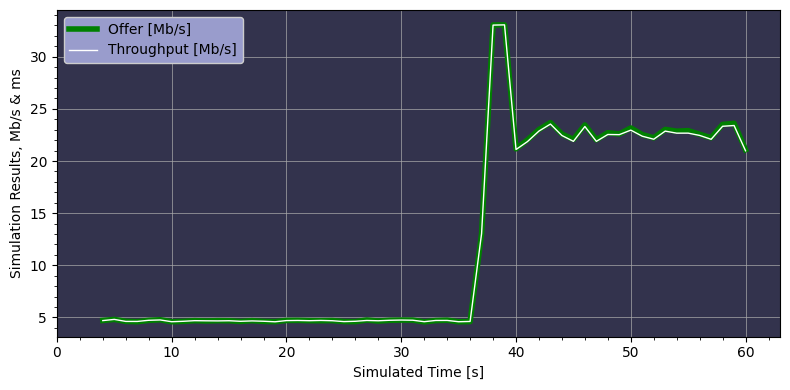

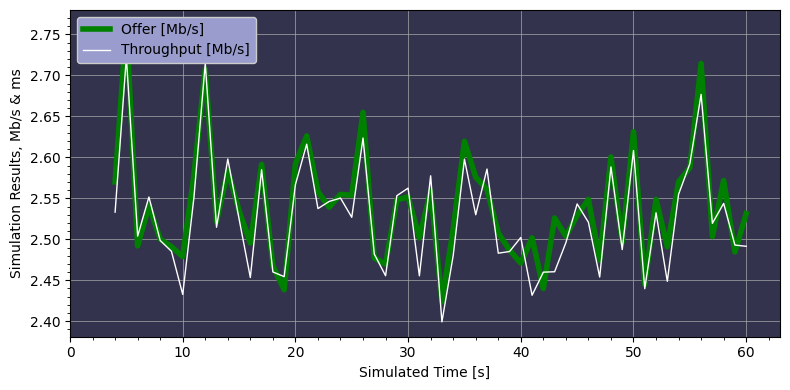

In [17]:
def plot_thrp_offer(result_total_offer, result_total_thrp):
    fig, ax = plt.subplots(figsize=(8, 4))
    theLineWidth = 2
    ax.cla()
    ax.grid(color="#AAAAAA", linewidth=.5, linestyle='-', alpha=1)
    ax.axis([None, None, None, None])
    ax.set_facecolor((.2, 0.2, 0.3))
    plt.xlim(0, np.max(result_total_offer.iloc[:, 0]) / 1000 * 1.05)  # Set x-axis limits
    #plt.ylim(0, ylim)  # Set y-axis limits
    plt.xlabel('Simulated Time [s]')
    plt.ylabel('Simulation Results, Mb/s & ms')
    plt.grid(True)  # Turn on the grid
    plt.minorticks_on()  # Enable minor ticks

    plt.plot(result_total_offer.iloc[:, 0] / 1000, result_total_offer.iloc[:, 6], '-', color='g', linewidth=4, label='Offer [Mb/s]')
    plt.plot(result_total_thrp.iloc[:, 0] / 1000, result_total_thrp.iloc[:, 6], '-', color='w', linewidth=1, label='Throughput [Mb/s]')
    plt.legend(loc="upper left", fancybox=True, framealpha=1, facecolor=(.6, 0.61, 0.8))
    plt.tight_layout()


import os
if os.path.isdir("Results"):
    os.chdir("Results")

# Plot our stations total througput
result_total_offer = pd.read_csv("random_TitTatBlaster3000\\total_offer.csv", skiprows=2)
result_total_thrp = pd.read_csv("random_TitTatBlaster3000\\total_thrp.csv", skiprows=2)

plot_thrp_offer(result_total_offer, result_total_thrp)

result_total_thrp_corr = np.array([0 if pd.isna(x) else x for x in  np.asarray(result_total_thrp)[:, 6]])
print(sum(result_total_thrp_corr) / sum(np.asarray(result_total_offer)[:, 6]))

# Plot adversary stations total througput
result_total_offer = pd.read_csv("random_random\\total_offer.csv", skiprows=2)
result_total_thrp = pd.read_csv("random_random\\total_thrp.csv", skiprows=2)

plot_thrp_offer(result_total_offer, result_total_thrp)

result_total_thrp_corr = np.array([0 if pd.isna(x) else x for x in  np.asarray(result_total_thrp)[:, 6]])
print(sum(result_total_thrp_corr) / sum(np.asarray(result_total_offer)[:, 6]))

os.chdir(ROOT_DIR)

### APPENDIX: Source and License

This notebook makes use of https://github.com/Team334/notebooks/blob/master/PID.ipynb

MIT License

Copyright (c) 2017 Team 334 - TechKnights

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

<p align="center" width="100%">═════════════════════════════════<br>
 Stefan Mangold (<a href="mailto:stefan.mangold@inf.ethz.ch">stefan.mangold@inf.ethz.ch</a>)<br><img width="200px" height="auto" src="../Admin/eth_logo_kurz_pos.png"></p>